In [1]:
from pandas import Series,DataFrame
import pandas as pd
import numpy as np

In [1]:
import matplotlib.pyplot as plt 
import matplotlib as mpl
import seaborn as sns

## 5.1 数据清洗

### 5.1.1 缺失值处理

In [14]:
#空值：np.nan
df1 = DataFrame([[3,5,3],[1,6,np.nan],
                ['lili',np.nan,'pop'],[np.nan,'a','b']],columns=['a','b','c'])
df1

a    b    c
0     3    5    3
1     1    6  NaN
2  lili  NaN  pop
3   NaN    a    b

1.侦测缺失值

In [28]:
df1.isnull()   #True的为缺失值

a      b      c
0  False  False  False
1  False  False   True
2  False   True  False
3   True  False  False

In [30]:
df1['a'].isnull()  #对一列的判断

0    False
1    False
2    False
3     True
Name: a, dtype: bool

In [31]:
df1[:1].isnull()   #对一行的判断

a      b      c
0  False  False  False

In [32]:
df1.notnull()   #False为缺失值

a      b      c
0   True   True   True
1   True   True  False
2   True  False   True
3  False   True   True

In [20]:
#各列缺失值计数
df1.isnull().sum()

a    1
b    1
c    1
dtype: int64

In [4]:
#各行缺失值计数
df1.isnull().sum(axis=1)

0    0
1    1
2    1
3    1
dtype: int64

In [48]:
#总缺失值计数
df1.isnull().sum().sum()   

3

In [58]:
df1

a    b    c
0     3    5    3
1     1    6  NaN
2  lili  NaN  pop
3   NaN    a    b

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
0    3 non-null object
1    3 non-null object
2    3 non-null object
dtypes: object(3)
memory usage: 176.0+ bytes


2.删除缺失值

In [5]:
#删除具有缺失值的行，
df1.dropna()  #不改变原DataFrame
#df1

a  b  c
0  3  5  3

In [21]:
#how="all"则删除全部为NaN的行
df2 = DataFrame(np.arange(12).reshape(3,4))
df2

0  1   2   3
0  0  1   2   3
1  4  5   6   7
2  8  9  10  11

In [22]:
#np.nan表示空值
df2.iloc[2,:] = np.nan  #iloc表示第2行
df2[3] = np.nan  #没有loc或iloc，表示“3”列
df2

0    1    2   3
0  0.0  1.0  2.0 NaN
1  4.0  5.0  6.0 NaN
2  NaN  NaN  NaN NaN

In [20]:
df2.dropna(how='all')

0    1    2   3
0  0.0  1.0  2.0 NaN
1  4.0  5.0  6.0 NaN

In [21]:
df2.dropna(how='all',axis=1)

0    1    2
0  0.0  1.0  2.0
1  4.0  5.0  6.0
2  NaN  NaN  NaN

In [86]:
df2  #不改变原数据

0    1    2   3
0  0.0  1.0  2.0 NaN
1  4.0  5.0  6.0 NaN
2  NaN  NaN  NaN NaN

3.填充缺失值

In [87]:
df2.fillna(0)

0    1    2    3
0  0.0  1.0  2.0  0.0
1  4.0  5.0  6.0  0.0
2  0.0  0.0  0.0  0.0

In [24]:
df2.fillna({1:6,3:0})  #以字典为参数，表示第1列的缺失值填充6，第3列的缺失值填充0
#只能填充列

0    1    2    3
0  0.0  1.0  2.0  0.0
1  4.0  5.0  6.0  0.0
2  NaN  6.0  NaN  0.0

In [95]:
df2  #不改变原数据，除非inplace=True

0    1    2   3
0  0.0  1.0  2.0 NaN
1  4.0  5.0  6.0 NaN
2  NaN  NaN  NaN NaN

In [9]:
df2.fillna({1:6,3:0},inplace=True)
df2

0    1    2    3
0  0.0  1.0  2.0  0.0
1  4.0  5.0  6.0  0.0
2  NaN  6.0  NaN  0.0

In [10]:
#ffill用前面数据填充
df2.fillna(method='ffill')  #ffill也可以用于reindex()方法

0    1    2    3
0  0.0  1.0  2.0  0.0
1  4.0  5.0  6.0  0.0
2  4.0  6.0  6.0  0.0

In [11]:
df2

0    1    2    3
0  0.0  1.0  2.0  0.0
1  4.0  5.0  6.0  0.0
2  NaN  6.0  NaN  0.0

In [12]:
#指定某一列的填充
df2[0] = df2[0].fillna(df2[0].mean())  #以第0列的均值填充
df2

0    1    2    3
0  0.0  1.0  2.0  0.0
1  4.0  5.0  6.0  0.0
2  2.0  6.0  NaN  0.0

In [67]:
#查询
df2.fillna?

### 5.1.2 移除重复数据

In [13]:
data = {
    'name':['张三', '李四', '张三', '小明'],
    'sex':['female', 'male', 'female', 'male'],
    'year':[2001, 2002, 2001, 2002],
    'city':['北京', '上海', '北京', '北京']
}
df1 = DataFrame(data)
df1

name     sex  year city
0   张三  female  2001   北京
1   李四    male  2002   上海
2   张三  female  2001   北京
3   小明    male  2002   北京

In [8]:
#判断各行是否有重复数据
df1.duplicated()
#如何查看有几行重复的数据？

0    False
1    False
2     True
3    False
dtype: bool

In [115]:
#删除重复项
df1.drop_duplicates()  #不改变原数据，除非inplace=True
#df1

name     sex  year city
0   张三  female  2001   北京
1   李四    male  2002   上海
3   小明    male  2002   北京

In [123]:
#删除指定的部分重复列,inplace=True改变元数据
df1.drop_duplicates(['sex','year'])

name     sex  year city
0   张三  female  2001   北京
1   李四    male  2002   上海

In [124]:
#keep='last'保留最后一个出现的数据，注意索引是不同的
df1.drop_duplicates(['sex','year'],keep='last')

name     sex  year city
2   张三  female  2001   北京
3   小明    male  2002   北京

### 5.1.3替换值

In [14]:
data = {
    'name':['张三', '李四', '王五', '小明'],
    'sex':['female', 'male', '', 'male'],
    'year':[2001, 2003, 2001, 2002],
    'city':['北京', '上海', '', '北京']
}
df1 = DataFrame(data)
df1

name     sex  year city
0   张三  female  2001   北京
1   李四    male  2003   上海
2   王五          2001     
3   小明    male  2002   北京

In [13]:
df1.replace('','不详')
#df1

name     sex  year city
0   张三  female  2001   北京
1   李四    male  2003   上海
2   王五      不详  2001   不详
3   小明    male  2002   北京

In [133]:
#多值替换，传入列表
df1.replace(['',2001],['不详',2002])  #''替换成'不详'，2001替换成2002

name     sex  year city
0   张三  female  2002   北京
1   李四    male  2003   上海
2   王五      不详  2002   不详
3   小明    male  2002   北京

In [134]:
#多值替换，传入字典
df1.replace({'':'不详',2001:2002})  #''替换成'不详'，2001替换成2002

name     sex  year city
0   张三  female  2002   北京
1   李四    male  2003   上海
2   王五      不详  2002   不详
3   小明    male  2002   北京

### 5.1.4利用函数或映射进行数据替换

map(): Seris的每个元素<br/>
apply(): DataFrame的行或列<br/>
applymap(): DataFrame的每个元素

In [15]:
data = {
    'name':['张三', '李四', '王五', '小明'],
    'math':[79, 52, 63, 92]
}
df2 = DataFrame(data)
df2

name  math
0   张三    79
1   李四    52
2   王五    63
3   小明    92

In [17]:
def f(x):
    if x >= 90:
        return '优秀'
    elif 70<=x<90:
        return '良好'
    elif 60<=x<70:
        return '合格'
    else:
        return '不合格'

In [20]:
df2['class'] = df2['math'].map(f)
df2

name  math class
0   张三    79    良好
1   李四    52   不合格
2   王五    63    合格
3   小明    92    优秀

转换一列数据也可以用apply

In [24]:
df2.drop?

In [21]:
del df2['class']  #df2 = df2.drop(columns=['class'])
df2

name  math
0   张三    79
1   李四    52
2   王五    63
3   小明    92

In [50]:
df2['class'] = df2['math'].apply(f)
df2

math name class
0    79   张三    良好
1    52   李四   不合格
2    63   王五    合格
3    92   小明    优秀

### 5.1.3检测异常值

散点图判断异常值

In [59]:
df3['Y']<(df3['Y'].mean()+3*df3['Y'].std())

0    True
1    True
2    True
3    True
4    True
5    True
6    True
7    True
8    True
9    True
Name: Y, dtype: bool

In [43]:
df3 = DataFrame(np.arange(10),columns=['X'])
df3['Y'] = 2 * df3['X'] + 0.5
df3.iloc[9,1] = 185
df3

X      Y
0  0    0.5
1  1    2.5
2  2    4.5
3  3    6.5
4  4    8.5
5  5   10.5
6  6   12.5
7  7   14.5
8  8   16.5
9  9  185.0

In [3]:
df3.drop

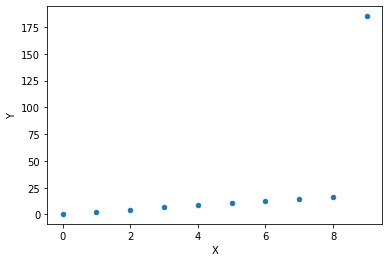

In [10]:
df3.plot(kind='scatter',x='X',y='Y')

In [10]:
#如何按条件删除？
df3.drop(df3[df3['X']>5].index)  #index属性是关键
#df3   #也不改变原数据

X     Y
0  0   0.5
1  1   2.5
2  2   4.5
3  3   6.5
4  4   8.5
5  5  10.5

### 5.1.6虚拟变量

In [28]:
df = DataFrame({
    '朝向':['东','南','东','西','北'],
    '价格':[1200,2100,2300,2900,1400]
})
df

朝向    价格
0  东  1200
1  南  2100
2  东  2300
3  西  2900
4  北  1400

In [11]:
pd.get_dummies(df['朝向']) 

东  北  南  西
0  1  0  0  0
1  0  0  1  0
2  1  0  0  0
3  0  0  0  1
4  0  1  0  0

对于多类别的数据而言，具体情况具体分析。

In [29]:
df2 = DataFrame({
    '朝向':['东/北','西/南','东','西/北','北'],
    '价格':[1200,2100,2300,2900,1400]
})
df2

朝向    价格
0  东/北  1200
1  西/南  2100
2    东  2300
3  西/北  2900
4    北  1400

In [149]:
dummies = df2['朝向'].apply(lambda x:Series(x.split('/')).value_counts())
dummies

东    北    南    西
0  1.0  1.0  NaN  NaN
1  NaN  NaN  1.0  1.0
2  1.0  NaN  NaN  NaN
3  NaN  1.0  NaN  1.0
4  NaN  1.0  NaN  NaN

In [151]:
df2['朝向']

0    东/北
1    西/南
2      东
3    西/北
4      北
Name: 朝向, dtype: object

In [30]:
'东/北'.split('/')

['东', '北']

In [31]:
Series('东/北'.split('/'))

0    东
1    北
dtype: object

In [146]:
Series('东/北'.split('/')).value_counts()

东    1
北    1
dtype: int64

In [19]:
dummies = dummies.fillna(0).astype(int)
dummies

东  北  南  西
0  1  1  0  0
1  0  0  1  1
2  1  0  0  0
3  0  1  0  1
4  0  1  0  0

## 5.2数据合并和重塑

### 5.2.1 merge合并

In [91]:
df1=DataFrame(np.arange(1,9).reshape(4,2))
df2=DataFrame(np.arange(5,9).reshape(2,2))
df1.index=[0,1,0,1]
df1

0  1
0  1  2
1  3  4
0  5  6
1  7  8

In [81]:
df2

0  1
0  5  6
1  7  8

In [87]:
pd.merge(df1,df2)

Empty DataFrame
Columns: [0, 1]
Index: []

In [89]:
t=pd.merge(df1,df2,left_index=True,right_index=True)
t.columns=[0,1,0,1]
t

0  1  0  1
0  1  2  5  6
1  3  4  7  8

In [33]:
price = DataFrame({
    'fruit':['apple','banana','orange'],
    'price':[23,32,45]
})
amount = DataFrame({
    'fruit':['apple','banana','apple','apple','banana','pear'],
    'amount':[5,3,6,3,5,7]
})

In [44]:
price

fruit  price
0   apple     23
1  banana     32
2  orange     45

In [45]:
amount

amount   fruit
0       5   apple
1       3  banana
2       6   apple
3       3   apple
4       5  banana
5       7    pear

In [37]:
pd.merge?
#left: 拼接的左侧DataFrame对象
#right: 拼接的右侧DataFrame对象

In [46]:
#默认按相同的列名进行合并，默认内连接
pd.merge(amount,price)

amount   fruit  price
0       5   apple     23
1       6   apple     23
2       3   apple     23
3       3  banana     32
4       5  banana     32

In [47]:
pd.merge(amount,price,on='fruit')

amount   fruit  price
0       5   apple     23
1       6   apple     23
2       3   apple     23
3       3  banana     32
4       5  banana     32

In [48]:
# 单独指定两方按照什么合并
pd.merge(amount,price,left_on='fruit',right_on='fruit')

amount   fruit  price
0       5   apple     23
1       6   apple     23
2       3   apple     23
3       3  banana     32
4       5  banana     32

连接方式另外还有：左连接、右连接、外连接

In [49]:
pd.merge(amount,price,how='left')

amount   fruit  price
0       5   apple   23.0
1       3  banana   32.0
2       6   apple   23.0
3       3   apple   23.0
4       5  banana   32.0
5       7    pear    NaN

In [50]:
pd.merge(amount,price,how='right')

amount   fruit  price
0     5.0   apple     23
1     6.0   apple     23
2     3.0   apple     23
3     3.0  banana     32
4     5.0  banana     32
5     NaN  orange     45

In [52]:
pd.merge(amount,price,how='outer')

amount   fruit  price
0     5.0   apple   23.0
1     6.0   apple   23.0
2     3.0   apple   23.0
3     3.0  banana   32.0
4     5.0  banana   32.0
5     7.0    pear    NaN
6     NaN  orange   45.0

多对多连接会产生笛卡尔积

In [53]:
price2 = DataFrame({
    'fruit':['apple','banana','orange','apple'],
    'price':[23,32,45,25]
})
amount2 = DataFrame({
    'fruit':['apple','banana','apple','apple','banana','pear'],
    'amount':[5,3,6,3,5,7]
})

In [54]:
amount2

amount   fruit
0       5   apple
1       3  banana
2       6   apple
3       3   apple
4       5  banana
5       7    pear

In [55]:
price2

fruit  price
0   apple     23
1  banana     32
2  orange     45
3   apple     25

In [57]:
pd.merge(amount2,price2)

amount   fruit  price
0       5   apple     23
1       5   apple     25
2       6   apple     23
3       6   apple     25
4       3   apple     23
5       3   apple     25
6       3  banana     32
7       5  banana     32

通过多个键进行合并，即多个键都要匹配，on参数传入list

In [59]:
left = DataFrame({
    'key1':['one','one','two'],
    'key2':['a','b','a'],
    'val1':[2,3,4]
})
right = DataFrame({
    'key1':['one','one','two','two'],
    'key2':['a','a','a','b'],
    'val2':[5,6,7,8]
})

In [60]:
left

key1 key2  val1
0  one    a     2
1  one    b     3
2  two    a     4

In [61]:
right

key1 key2  val2
0  one    a     5
1  one    a     6
2  two    a     7
3  two    b     8

In [62]:
pd.merge(left,right,on=['key1','key2'],how='outer')

key1 key2  val1  val2
0  one    a   2.0   5.0
1  one    a   2.0   6.0
2  one    b   3.0   NaN
3  two    a   4.0   7.0
4  two    b   NaN   8.0

重名时，会自动重命名，用suffixes参数指定后缀

In [63]:
pd.merge(left,right,on='key1')

key1 key2_x  val1 key2_y  val2
0  one      a     2      a     5
1  one      a     2      a     6
2  one      b     3      a     5
3  one      b     3      a     6
4  two      a     4      a     7
5  two      a     4      b     8

In [64]:
pd.merge(left,right,on='key1',suffixes=('_left','_right'))

key1 key2_left  val1 key2_right  val2
0  one         a     2          a     5
1  one         a     2          a     6
2  one         b     3          a     5
3  one         b     3          a     6
4  two         a     4          a     7
5  two         a     4          b     8

连接键位于DataFrame的行索引上时，用left_index=True或right_index=True指定将索引作为连接键

In [153]:
left2 = DataFrame({
    'key':['a','a','b','b','c'],
    'val1':range(5)
})
right2 = DataFrame({
    'val2':[5,7]},
    index = ['a','b']
)

In [67]:
left2

key  val1
0   a     0
1   a     1
2   b     2
3   b     3
4   c     4

In [68]:
right2

val2
a     5
b     7

In [157]:
pd.merge(left2,right2,left_on='key',right_index=True)   #将right2的索引作为连接键

key  val1  val2
0   a     0     5
1   a     1     5
2   b     2     7
3   b     3     7

join方法快速完成按索引合并。注意其使用方式与merge方法不同

In [71]:
left3 = DataFrame({
    'val1':range(4)},
    index = ['a','b','a','c']
)
right3 = DataFrame({
    'val2':[5,7]},
    index = ['a','b']
)

In [72]:
left3

val1
a     0
b     1
a     2
c     3

In [73]:
right3

val2
a     5
b     7

In [74]:
left3.join(right3,how='outer')

val1  val2
a     0   5.0
a     2   5.0
b     1   7.0
c     3   NaN

### 5.2.2 concat连接

针对没有连接键的情况。

1. Series

In [4]:
s1 = Series([0,1],index=['a','b'])
s2 = Series([2,3],index=['c','d'])
s3 = Series([4,5],index=['e','f'])

In [24]:
#默认按行的方向堆叠数据
pd.concat([s1,s2,s3])

a    0
b    1
c    2
d    3
e    4
f    5
dtype: int64

In [6]:
#用axis=1表示按列进行连接，默认为外连接
pd.concat([s1,s2,s3],axis=1)
#pd.concat([s1,s2,s3],axis=1,join='inner')  #内连接还是要按照连接键

0    1    2
a  0.0  NaN  NaN
b  1.0  NaN  NaN
c  NaN  2.0  NaN
d  NaN  3.0  NaN
e  NaN  NaN  4.0
f  NaN  NaN  5.0

In [7]:
s4 = pd.concat([s1*10,s3])
s4

a     0
b    10
e     4
f     5
dtype: int64

In [10]:
pd.concat([s1,s4],axis=1)

0   1
a  0.0   0
b  1.0  10
e  NaN   4
f  NaN   5

In [164]:
#内连接
pd.concat([s1,s4],axis=1,join='inner')
#concat方法只有内连接和外连接

0   1
a  0   0
b  1  10

In [170]:
#指定索引顺序如下方法
pd.concat([s1,s4],axis=1,join='inner').reindex(['b','a'])  #不用书上的join_axes参数

0   1
b  1  10
a  0   0

按行合并时，可以通过keys参数创建层次化索引

In [15]:
pd.concat([s1,s4])

a     0
b     1
a     0
b    10
e     4
f     5
dtype: int64

In [28]:
pd.concat([s1,s4],keys=['one','two'])

one  a     0
     b     1
two  a     0
     b    10
     e     4
     f     5
dtype: int64

按列合并时，用keys指定列索引

In [18]:
pd.concat([s1,s4],axis=1,keys=['one','two'])

one  two
a  0.0    0
b  1.0   10
e  NaN    4
f  NaN    5

2. concat()方法对DataFrame同样适用

In [92]:
df1 = DataFrame({
    'val1':range(3)},
    index = ['a','b','c']
)
df2 = DataFrame({
    'val2':[5,7]},
    index = ['a','b']
)

In [198]:
df1

val1
a     0
b     1
c     2

In [30]:
df2

val2
a     5
b     7

In [93]:
pd.concat([df1,df2])

val1  val2
a   0.0   NaN
b   1.0   NaN
c   2.0   NaN
d   NaN   5.0
e   NaN   7.0

In [43]:
pd.concat([df1,df2],axis=1,keys=['one','two']) #层次化列索引

one  two
  val1 val2
a    0  5.0
b    1  7.0
c    2  NaN

In [18]:
dfdf1 = DataFrame([['a', 1], ['b', 2]],
                    columns=['letter', 'number'])

dfdf4 = DataFrame([['bird', 'polly'], ['monkey', 'george']],
                    columns=['animal', 'name'])
pd.concat([dfdf1,dfdf4],axis=1,keys=['a','b'])

a              b        
  letter number  animal    name
0      a      1    bird   polly
1      b      2  monkey  george

传入字典也可以完成连接，字典的键就是keys的值。

In [20]:
pd.concat({'one':df1,'two':df2},axis=1)
#pd.concat([df1,df2],axis=1,keys=['one','two'])

one  two
  val1 val2
a    0  5.0
b    1  7.0
c    2  NaN

默认连接可能会出现重复行索引，通过ignore_index=True设置忽略索引，并重排索引

In [21]:
df1 = DataFrame(np.random.randn(3,4),columns=['a','b','c','d'])
df2 = DataFrame(np.random.randn(2,2),columns=['d','c'])

In [22]:
df1

a         b         c         d
0  0.232482  2.050240 -0.662539 -0.878860
1  0.102744 -0.682584  1.299960  0.685179
2  2.603880  0.596594 -0.455612 -1.093334

In [23]:
df2

d         c
0  1.331305 -0.558595
1 -1.360843 -0.115113

In [223]:
pd.concat([df1,df2])

a         b         c         d
0  0.569026 -1.537308  0.039274 -1.618926
1 -0.433394  0.094079 -1.286004 -0.212213
2  1.183313 -0.304497 -0.419680 -0.071539
0       NaN       NaN -2.497855  0.810992
1       NaN       NaN -0.557653  0.704354

In [224]:
pd.concat([df1,df2],ignore_index=True)   #行索引重排

a         b         c         d
0  0.569026 -1.537308  0.039274 -1.618926
1 -0.433394  0.094079 -1.286004 -0.212213
2  1.183313 -0.304497 -0.419680 -0.071539
3       NaN       NaN -2.497855  0.810992
4       NaN       NaN -0.557653  0.704354

### 5.2.3 combine_first合并

存在重复列名的两个DataFrame合并，把缺失值“打补丁”

In [39]:
df1 = DataFrame({
    'a':[3,np.nan,6,np.nan],
    'b':[np.nan,4,6,np.nan]
})
df2 = DataFrame({
    'a':range(5),
    'b':range(5)
})

In [40]:
df1

a    b
0  3.0  NaN
1  NaN  4.0
2  6.0  6.0
3  NaN  NaN

In [41]:
df2

a  b
0  0  0
1  1  1
2  2  2
3  3  3
4  4  4

In [42]:
df1.combine_first(df2)

a    b
0  3.0  0.0
1  1.0  4.0
2  6.0  6.0
3  3.0  3.0
4  4.0  4.0

### 5.2.4 数据重塑

In [8]:
df = DataFrame(np.arange(9).reshape(3,3),
              index = ['a','b','c'],
              columns=['one','two','three'])
df.index.name = 'alph'  #可以给DataFrame的行索引和列索引起名
df.columns.name = 'number'
df.unstack()

number  alph
one     a       0
        b       3
        c       6
two     a       1
        b       4
        c       7
three   a       2
        b       5
        c       8
dtype: int32

In [49]:
result = df.stack()  #数据的堆叠
result  #形成层次化索引

alph  number
a     one       0
      two       1
      three     2
b     one       3
      two       4
      three     5
c     one       6
      two       7
      three     8
dtype: int32

In [56]:
#unstack()反向操作
result.unstack()

number  one  two  three
alph                   
a         0    1      2
b         3    4      5
c         6    7      8

默认按照最内层重塑，也可以指定级别编号或名称来进行重塑

In [57]:
result.unstack(0)

alph    a  b  c
number         
one     0  3  6
two     1  4  7
three   2  5  8

In [53]:
result.unstack('alph')

alph    a  b  c
number         
one     0  3  6
two     1  4  7
three   2  5  8

重塑操作的结果会使旋转轴位于最低级别

In [28]:
df = DataFrame(np.arange(16).reshape(4,4),
              index=[['one','one','two','two'],['a','b','a','b']],
              columns=[['apple','apple','orange','orange'],['red','green','red','green']])
df

apple       orange      
        red green    red green
one a     0     1      2     3
    b     4     5      6     7
two a     8     9     10    11
    b    12    13     14    15

In [59]:
df.stack() #使得['green','red']位于最底层

apple  orange
one a green      1       3
      red        0       2
    b green      5       7
      red        4       6
two a green      9      11
      red        8      10
    b green     13      15
      red       12      14

In [60]:
df.stack().stack()

one  a  green  apple      1
               orange     3
        red    apple      0
               orange     2
     b  green  apple      5
               orange     7
        red    apple      4
               orange     6
two  a  green  apple      9
               orange    11
        red    apple      8
               orange    10
     b  green  apple     13
               orange    15
        red    apple     12
               orange    14
dtype: int32

In [61]:
df

apple       orange      
        red green    red green
one a     0     1      2     3
    b     4     5      6     7
two a     8     9     10    11
    b    12    13     14    15

In [30]:
df.unstack()  #使得['a','b']位于最底层

apple               orange              
      red     green        red     green    
        a   b     a   b      a   b     a   b
one     0   4     1   5      2   6     3   7
two     8  12     9  13     10  14    11  15

In [29]:
df.unstack().unstack()

apple   red    a  one     0
                  two     8
               b  one     4
                  two    12
        green  a  one     1
                  two     9
               b  one     5
                  two    13
orange  red    a  one     2
                  two    10
               b  one     6
                  two    14
        green  a  one     3
                  two    11
               b  one     7
                  two    15
dtype: int32

## 5.3字符串处理

### 5.3.1字符串方法

In [43]:
data = {
    'data':['张三|男', '李四|女', '王五|女', '小明|男'],
    'age':[12,23,34,45]
}
df = DataFrame(data)
df
#如何把data拆分成两列？

data  age
0  张三|男   12
1  李四|女   23
2  王五|女   34
3  小明|男   45

方法1：通过apply()函数

In [34]:
result = df['data'].apply(lambda x:Series(x.split('|')))
result
#result.columns=['name','gender']
#result.join(df['age'])

0  1
0  张三  男
1  李四  女
2  王五  女
3  小明  男

In [86]:
Series('张三|男'.split('|'))

0    张三
1     男
dtype: object

pandas字段的str属性可以调用字符串的相关方法，并应用到整个字段中（矢量化运算）

方法2

In [106]:
df['data'].str.split('|')

0    [张三, 男]
1    [李四, 女]
2    [王五, 女]
3    [小明, 男]
Name: data, dtype: object

In [107]:
list(df['data'].str.split('|'))

[['张三', '男'], ['李四', '女'], ['王五', '女'], ['小明', '男']]

In [109]:
DataFrame(list(df['data'].str.split('|')))

0  1
0  张三  男
1  李四  女
2  王五  女
3  小明  男

方法3

In [36]:
new_df = df['data'].str.split('|')
new_df

0    [张三, 男]
1    [李四, 女]
2    [王五, 女]
3    [小明, 男]
Name: data, dtype: object

In [37]:
df['name'] = new_df.str[0]  #矢量化运算
df['sex'] = new_df.str[1]
df

data  age name sex
0  张三|男   12   张三   男
1  李四|女   23   李四   女
2  王五|女   34   王五   女
3  小明|男   45   小明   男

### 5.3.2正则表达式

In [38]:
df2 = DataFrame({
    'email':['102345@qq.com','342167@qq.com','65132@qq.com']
})
df2

email
0  102345@qq.com
1  342167@qq.com
2   65132@qq.com

In [145]:
df2['email'].str.findall('(.*?)@')
#正则表达式的详细说明参见：https://docs.python.org/zh-cn/3/library/re.html

0    [102345]
1    [342167]
2     [65132]
Name: email, dtype: object

In [40]:
df2['QQ'] = df2['email'].str.findall('(.*?)@').str.get(0)  # str.get(0)等同于str[0]
df2

email      QQ
0  102345@qq.com  102345
1  342167@qq.com  342167
2   65132@qq.com   65132

## 5.4综合示——iris数据集

In [41]:
from pandas import Series,DataFrame
import pandas as pd
import numpy as np
import seaborn as sns  #导入seaborn绘图库

In [43]:
path="F:/teaching/数据科学基础/data/数据/"

In [44]:
iris_data = pd.read_csv(path+'iris-data.csv')
iris_data.head()

sepal_length_cm  sepal_width_cm  petal_length_cm  petal_width_cm  \
0              5.1             3.5              1.4             0.2   
1              4.9             3.0              1.4             0.2   
2              4.7             3.2              1.3             0.2   
3              4.6             3.1              1.5             0.2   
4              5.0             3.6              1.4             0.2   

         class  
0  Iris-setosa  
1  Iris-setosa  
2  Iris-setosa  
3  Iris-setosa  
4  Iris-setosa

In [261]:
iris_data.shape

(150, 5)

In [45]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  150 non-null    float64
 1   sepal_width_cm   150 non-null    float64
 2   petal_length_cm  150 non-null    float64
 3   petal_width_cm   145 non-null    float64
 4   class            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [262]:
iris_data.describe()

sepal_length_cm  sepal_width_cm  petal_length_cm  petal_width_cm
count       150.000000      150.000000       150.000000      145.000000
mean          5.644627        3.054667         3.758667        1.236552
std           1.312781        0.433123         1.764420        0.755058
min           0.055000        2.000000         1.000000        0.100000
25%           5.100000        2.800000         1.600000        0.400000
50%           5.700000        3.000000         4.350000        1.300000
75%           6.400000        3.300000         5.100000        1.800000
max           7.900000        4.400000         6.900000        2.500000

In [263]:
iris_data['class'].unique()

array(['Iris-setosa', 'Iris-setossa', 'Iris-versicolor', 'versicolor',
       'Iris-virginica'], dtype=object)

In [266]:
iris_data.loc[iris_data['class'] == 'versicolor', 'class'] = 'Iris-versicolor'
iris_data.loc[iris_data['class'] == 'Iris-setossa', 'class'] = 'Iris-setosa'

iris_data['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [267]:
pd.set_option('mode.chained_assignment',None)

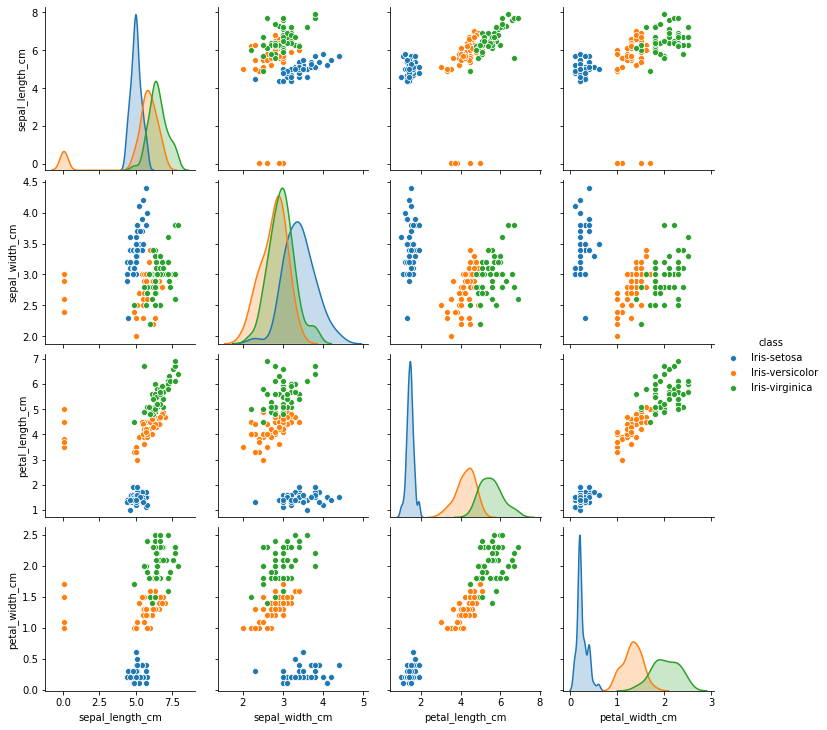

In [268]:
sns.pairplot(iris_data, hue='class')

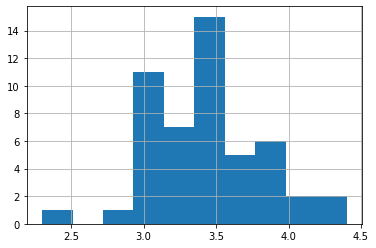

In [270]:
iris_data.loc[iris_data['class'] == 'Iris-setosa', 'sepal_width_cm'].hist()

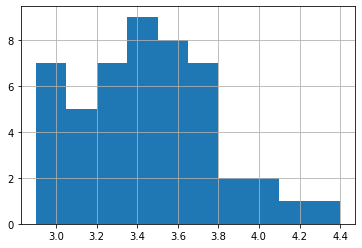

In [271]:
iris_data = iris_data.loc[(iris_data['class'] != 'Iris-setosa') | (iris_data['sepal_width_cm'] >= 2.5)]
iris_data.loc[iris_data['class'] == 'Iris-setosa', 'sepal_width_cm'].hist()

In [272]:
iris_data.loc[(iris_data['class'] == 'Iris-versicolor') &
              (iris_data['sepal_length_cm'] < 1.0)]

sepal_length_cm  sepal_width_cm  petal_length_cm  petal_width_cm  \
77            0.067             3.0              5.0             1.7   
78            0.060             2.9              4.5             1.5   
79            0.057             2.6              3.5             1.0   
80            0.055             2.4              3.8             1.1   
81            0.055             2.4              3.7             1.0   

              class  
77  Iris-versicolor  
78  Iris-versicolor  
79  Iris-versicolor  
80  Iris-versicolor  
81  Iris-versicolor

In [273]:
iris_data.loc[(iris_data['class'] == 'Iris-versicolor') &
              (iris_data['sepal_length_cm'] < 1.0),
              'sepal_length_cm'] *= 100.0

In [274]:
iris_data.isnull().sum()

sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     5
class              0
dtype: int64

In [275]:
iris_data[iris_data['petal_width_cm'].isnull()]

sepal_length_cm  sepal_width_cm  petal_length_cm  petal_width_cm  \
7               5.0             3.4              1.5             NaN   
8               4.4             2.9              1.4             NaN   
9               4.9             3.1              1.5             NaN   
10              5.4             3.7              1.5             NaN   
11              4.8             3.4              1.6             NaN   

          class  
7   Iris-setosa  
8   Iris-setosa  
9   Iris-setosa  
10  Iris-setosa  
11  Iris-setosa

In [276]:
iris_data.dropna(inplace=True)

In [277]:
iris_data.to_csv(path+'iris-clean-data.csv', index=False)

In [278]:
iris_data = pd.read_csv(path+'iris-clean-data.csv')
iris_data.head()

sepal_length_cm  sepal_width_cm  petal_length_cm  petal_width_cm  \
0              5.1             3.5              1.4             0.2   
1              4.9             3.0              1.4             0.2   
2              4.7             3.2              1.3             0.2   
3              4.6             3.1              1.5             0.2   
4              5.0             3.6              1.4             0.2   

         class  
0  Iris-setosa  
1  Iris-setosa  
2  Iris-setosa  
3  Iris-setosa  
4  Iris-setosa

In [279]:
iris_data.shape

(144, 5)

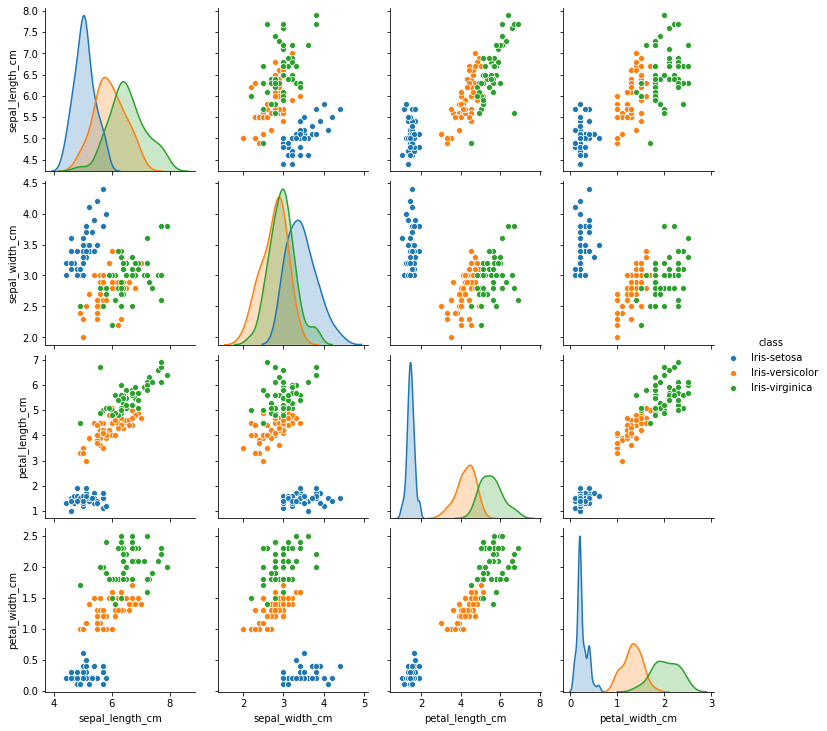

In [280]:
sns.pairplot(iris_data, hue='class')

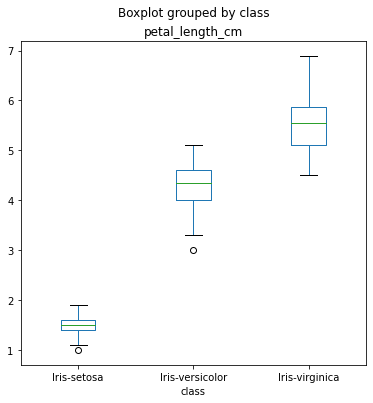

In [281]:
iris_data.boxplot(column='petal_length_cm', by='class',grid=False,figsize=(6,6))

In [282]:
iris_data.boxplot?